# Завдання

В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Dropout, Bidirectional

2024-12-10 22:02:40.740092: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [11]:
def plot_training_validation_metrics(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
    plt.title('Точність тренування і валідації')
    plt.legend()
    
    plt.figure()
    
    plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
    plt.title('Втрати тренування і валідації')
    plt.legend()
    
    plt.show()

In [5]:
def evaluate_model_predictions(model):
    predictions = model.predict(input_test)

    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]
    
    for i in range(10):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")
    
    test_loss, test_acc = model.evaluate(input_test, y_test)
    print('Test Loss: {}'.format(test_loss))
    print('Test Accuracy: {}'.format(test_acc))

## RNN model

In [6]:
rnn_model = Sequential()
rnn_model.add(Embedding(max_features, 32))
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dense(1, activation='sigmoid'))

In [7]:
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [8]:
history = rnn_model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 129ms/step - acc: 0.5793 - loss: 0.6645 - val_acc: 0.7508 - val_loss: 0.5137
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 18s 132ms/step - acc: 0.8414 - loss: 0.3855 - val_acc: 0.7992 - val_loss: 0.4783
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 20s 132ms/step - acc: 0.8795 - loss: 0.3174 - val_acc: 0.8579 - val_loss: 0.3391
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 138ms/step - acc: 0.9442 - loss: 0.1681 - val_acc: 0.8589 - val_loss: 0.3768
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 140ms/step - acc: 0.9696 - loss: 0.1036 - val_acc: 0.8471 - val_loss: 0.4067
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 140ms/step - acc: 0.9851 - loss: 0.0564 - val_acc: 0.8649 - val_loss: 0.4206
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 140ms/step - acc: 0.9915 - loss: 0.0377 - val_acc: 0.8629 - val_loss: 0.4819
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 139ms/step - acc: 0.9965 - loss: 0.0181 - val_acc: 0.8528 - val_loss: 0.4931
Epoch 9/10
137/137 ━━━━━━━━━━━━━

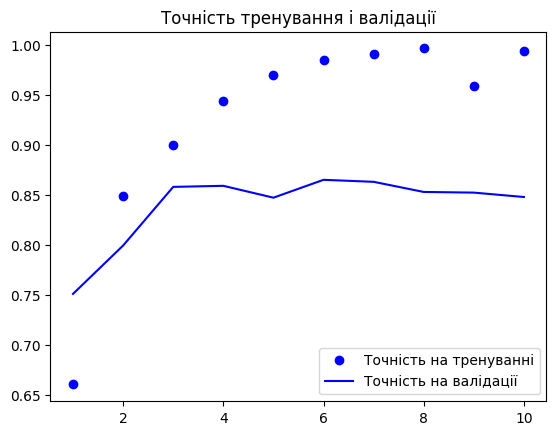

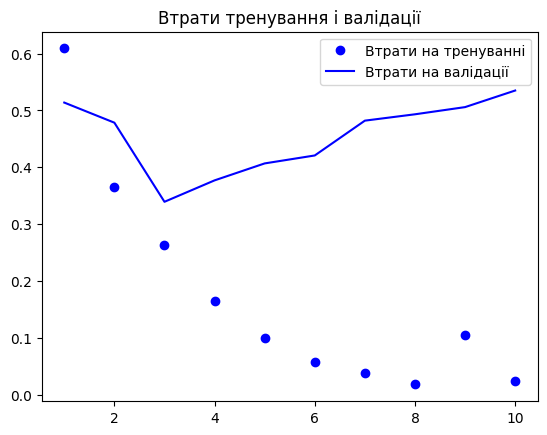

In [12]:
plot_training_validation_metrics(history)

In [13]:
evaluate_model_predictions(rnn_model)

782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - acc: 0.8408 - loss: 0.5819
Test Loss: 0.5880436301231384
Test Accuracy: 0.8392800092697144


In [14]:
rnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 966,341 (3.69 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644,228 (2.46 MB)

## LSTM model

In [15]:
lstm_model = Sequential()
lstm_model.add(Embedding(max_features, 32))
lstm_model.add(LSTM(32))
lstm_model.add(Dense(1, activation='sigmoid'))

In [16]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [17]:
lstm_history = lstm_model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 263ms/step - acc: 0.5855 - loss: 0.6571 - val_acc: 0.8221 - val_loss: 0.3987
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 289ms/step - acc: 0.8663 - loss: 0.3244 - val_acc: 0.8597 - val_loss: 0.3330
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 302ms/step - acc: 0.9207 - loss: 0.2202 - val_acc: 0.8796 - val_loss: 0.3468
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 295ms/step - acc: 0.9097 - loss: 0.2390 - val_acc: 0.8740 - val_loss: 0.3294
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 299ms/step - acc: 0.9599 - loss: 0.1264 - val_acc: 0.8664 - val_loss: 0.3572
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 290ms/step - acc: 0.9681 - loss: 0.1044 - val_acc: 0.8748 - val_loss: 0.4021
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 283ms/step - acc: 0.9741 - loss: 0.0878 - val_acc: 0.8712 - val_loss: 0.4239
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 39s 283ms/step - acc: 0.9799 - loss: 0.0737 - val_acc: 0.8669 - val_loss: 0.4432
Epoch 9/10
137/137 ━━━━━━━━━━━━━

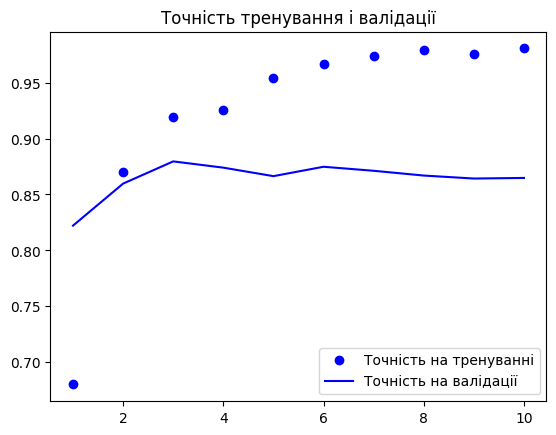

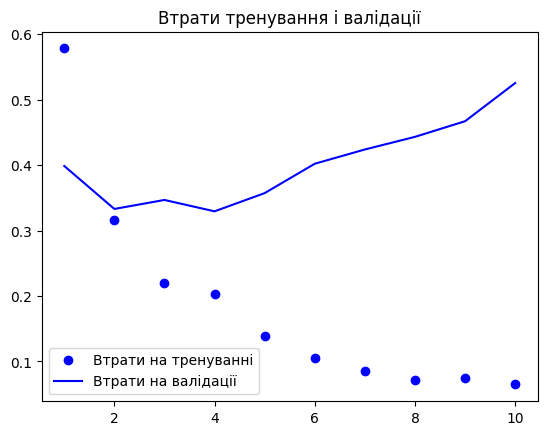

In [18]:
plot_training_validation_metrics(lstm_history)

In [19]:
evaluate_model_predictions(lstm_model)

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - acc: 0.8532 - loss: 0.5631
Test Loss: 0.5646356344223022
Test Accuracy: 0.8522400259971619


In [20]:
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 985,061 (3.76 MB)

 Trainable params: 328,353 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 656,708 (2.51 MB)

## Deep LSTM model

In [21]:
deep_lstm_model = Sequential()
deep_lstm_model.add(Embedding(max_features, 32))
deep_lstm_model.add(LSTM(32, return_sequences=True))
deep_lstm_model.add(Dropout(0.2))
deep_lstm_model.add(LSTM(32, return_sequences=True))
deep_lstm_model.add(Dropout(0.2))
deep_lstm_model.add(LSTM(32, return_sequences=False))
deep_lstm_model.add(Dropout(0.2))
deep_lstm_model.add(Dense(1, activation='sigmoid'))

In [22]:
deep_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [23]:
deep_lstm_history = deep_lstm_model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 121s 851ms/step - acc: 0.6293 - loss: 0.6050 - val_acc: 0.8179 - val_loss: 0.4177
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 144s 870ms/step - acc: 0.8797 - loss: 0.3223 - val_acc: 0.8661 - val_loss: 0.3166
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 123s 898ms/step - acc: 0.9341 - loss: 0.1901 - val_acc: 0.8323 - val_loss: 0.3693
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 119s 867ms/step - acc: 0.9382 - loss: 0.1760 - val_acc: 0.8707 - val_loss: 0.3338
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 118s 859ms/step - acc: 0.9660 - loss: 0.1073 - val_acc: 0.8748 - val_loss: 0.3714
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 117s 857ms/step - acc: 0.9787 - loss: 0.0720 - val_acc: 0.8469 - val_loss: 0.5446
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 117s 854ms/step - acc: 0.9728 - loss: 0.0823 - val_acc: 0.8697 - val_loss: 0.4848
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 117s 851ms/step - acc: 0.9789 - loss: 0.0711 - val_acc: 0.8640 - val_loss: 0.5029
Epoch 9/10
137/137 ━━━━━

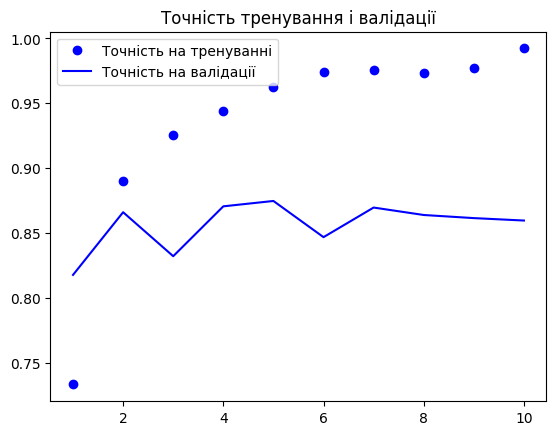

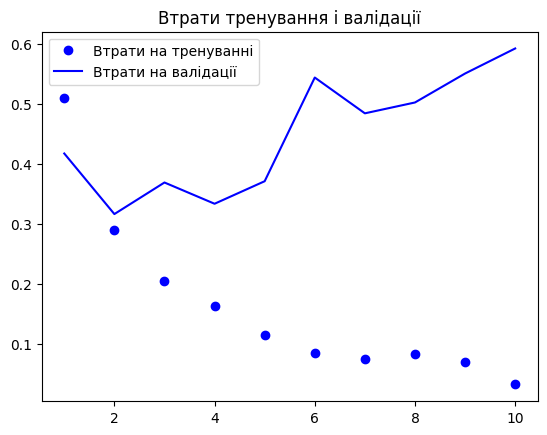

In [24]:
plot_training_validation_metrics(deep_lstm_history)

In [25]:
evaluate_model_predictions(deep_lstm_model)

782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 111s 142ms/step - acc: 0.8480 - loss: 0.6526
Test Loss: 0.6528173685073853
Test Accuracy: 0.8479599952697754


In [26]:
deep_lstm_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 500, 32)        │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 500, 32)        │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,034,981 (3.95 MB)

 Trainable params: 344,993 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 689,988 (2.63 MB)

## Bidirectional LSTM model

In [27]:
bidirect_lstm_model = Sequential()
bidirect_lstm_model.add(Embedding(max_features, 32))
bidirect_lstm_model.add(Bidirectional(LSTM(32)))
bidirect_lstm_model.add(Dense(1, activation='sigmoid'))

In [28]:
bidirect_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [29]:
bidirect_lstm_history = bidirect_lstm_model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 59s 403ms/step - acc: 0.5981 - loss: 0.6401 - val_acc: 0.8045 - val_loss: 0.4504
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 56s 408ms/step - acc: 0.8680 - loss: 0.3256 - val_acc: 0.8652 - val_loss: 0.3291
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 56s 408ms/step - acc: 0.9254 - loss: 0.2070 - val_acc: 0.8735 - val_loss: 0.3286
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 56s 406ms/step - acc: 0.9460 - loss: 0.1628 - val_acc: 0.8785 - val_loss: 0.3190
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 55s 402ms/step - acc: 0.9591 - loss: 0.1249 - val_acc: 0.8744 - val_loss: 0.3722
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 75s 354ms/step - acc: 0.9694 - loss: 0.0996 - val_acc: 0.8707 - val_loss: 0.3958
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 54s 394ms/step - acc: 0.9702 - loss: 0.0957 - val_acc: 0.8657 - val_loss: 0.4114
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 55s 404ms/step - acc: 0.9816 - loss: 0.0688 - val_acc: 0.8681 - val_loss: 0.4347
Epoch 9/10
137/137 ━━━━━━━━━━━━━

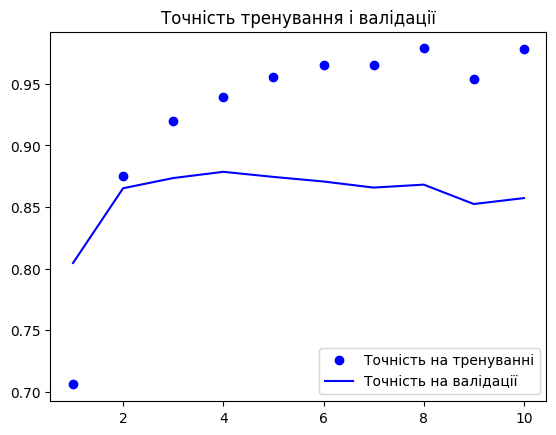

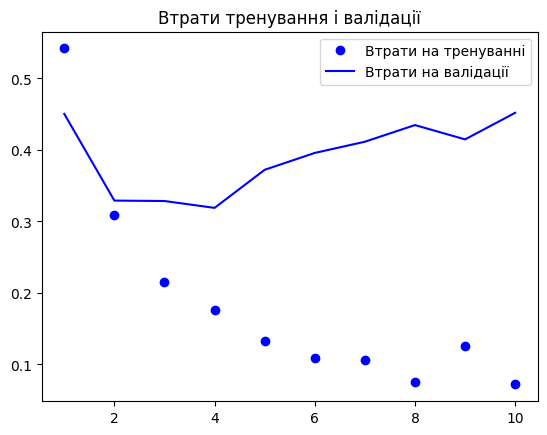

In [30]:
plot_training_validation_metrics(bidirect_lstm_history)

In [31]:
evaluate_model_predictions(bidirect_lstm_model)

782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - acc: 0.8460 - loss: 0.4898
Test Loss: 0.48279812932014465
Test Accuracy: 0.848360002040863


In [32]:
bidirect_lstm_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,010,117 (3.85 MB)

 Trainable params: 336,705 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 673,412 (2.57 MB)

## Висновки
LSTM і Bidirectional LSTM показали найкращі результати, з вищою точністю і меншими втратами порівняно з RNN і Deep LSTM.